<a href="https://colab.research.google.com/github/noahgift/Python-MLOps-Cookbook/blob/main/Baseball_Predictions_Export_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Regression

This notebook is featured in [Practical MLOps book by O'Reilly](https://learning.oreilly.com/library/view/practical-mlops/9781098103002/) as well a Coursera + Duke Course.

## Ingest

Source:  http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights

In [266]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/functional_intro_to_python/master/data/mlb_weight_ht.csv")
df.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


Find N/A

In [267]:
df.shape

(1034, 6)

In [268]:
df.isnull().values.any()

True

In [269]:
df = df.dropna()
df.isnull().values.any()

False

In [270]:
df.shape

(1033, 6)

### Clean

In [271]:
df.rename(index=str, 
             columns={"Height(inches)": "Height", "Weight(pounds)": "Weight"},
             inplace=True)
df.head()


,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


## EDA

In [272]:
df.describe()

,Height,Weight,Age
count,1033.000000,1033.000000,1033.000000
mean,73.698935,201.689255,28.737648
std,2.306330,20.991491,4.322298
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.930000
75%,75.000000,215.000000,31.240000
max,83.000000,290.000000,48.520000


What about positions?  What can we infer about a typical player from different positions?

In [273]:
df_positions = df.groupby("Position").median()
df_positions.reset_index(inplace=True)
df_positions

,Position,Height,Weight,Age
0,Catcher,73.0,205.0,30.060
1,Designated_Hitter,74.5,224.5,29.200
2,First_Baseman,74.0,220.0,28.800
3,Outfielder,73.0,200.0,28.140
4,Relief_Pitcher,74.0,200.0,27.560
5,Second_Baseman,72.0,185.0,28.435
6,Shortstop,72.0,180.0,27.800
7,Starting_Pitcher,74.5,205.0,27.390
8,Third_Baseman,73.0,200.0,27.900


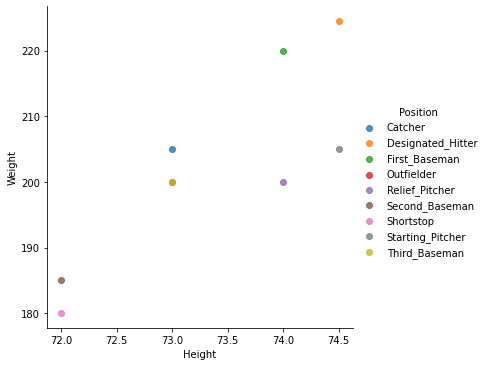

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="Height", y="Weight",data=df_positions, hue="Position")

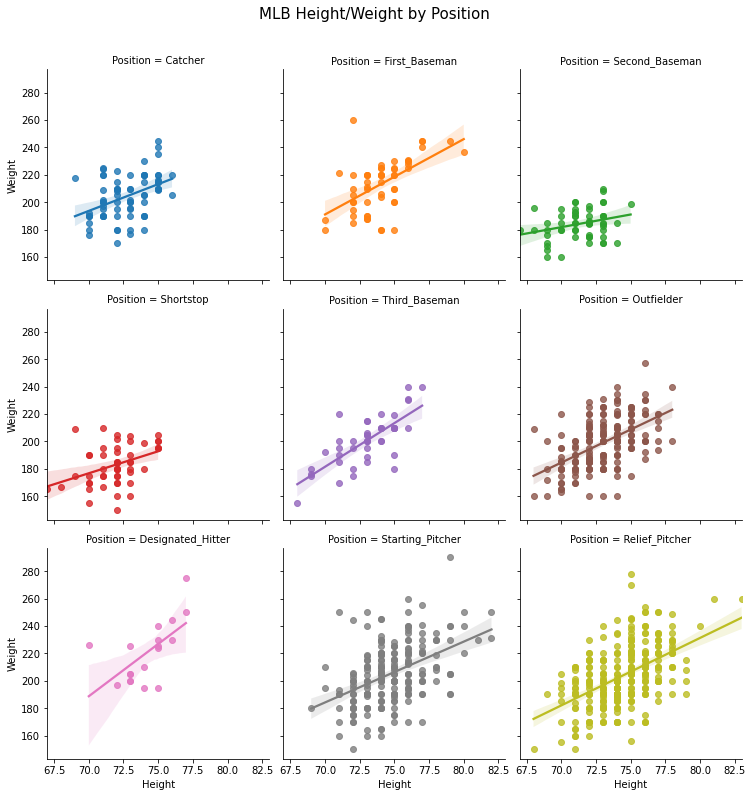

In [ ]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="Position", height=3.5, col_wrap=3, hue="Position")
g.fig.suptitle("MLB Height/Weight by Position", fontsize=15, y=1.05)
g.map(sns.regplot, "Height", "Weight")

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Select Feature

Using Weight to Predict Height, so just one feature


In [ ]:
var = df['Height'].values
var.shape

(1033,)

In [ ]:
y = df['Height'].values #Target
y = y.reshape(-1, 1)
X = df['Weight'].values #Feature(s)
X = X.reshape(-1,1)

In [ ]:
X.shape

(1033, 1)

In [ ]:
y.shape

(1033, 1)

### Split Data and Scale Data

Scaling workflow step by step to make it easier to understand

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaler = scaler.fit(X)
X


array([[180.],
       [215.],
       [210.],
       ...,
       [205.],
       [190.],
       [195.]])

In [ ]:
X = X_scaler.transform(X)
X

array([[-1.0337408 ],
       [ 0.6344091 ],
       [ 0.39610197],
       ...,
       [ 0.15779485],
       [-0.55712654],
       [-0.31881941]])

In [ ]:
y_scaler = scaler.fit(y)
y

array([[74],
       [74],
       [72],
       ...,
       [75],
       [75],
       [73]])

In [ ]:
y = y_scaler.transform(y)
y

array([[ 0.13060176],
       [ 0.13060176],
       [-0.73699706],
       ...,
       [ 0.56440117],
       [ 0.56440117],
       [-0.30319765]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(929, 1) (929, 1)
(104, 1) (104, 1)


### Fit the model

In [251]:
from sklearn.linear_model import Ridge
clf = Ridge()
model = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
y_test.shape

(104, 1)

In [ ]:
predictions.shape

(104, 1)

unscaled predictions, converted to DataFrame and described

In [255]:
df_predictions = pd.DataFrame(predictions)
df.describe()

,0
count,104.000000
mean,-0.052927
std,0.567257
min,-1.068324
25%,-0.499268
50%,-0.045303
75%,0.280785
max,2.256493


### Plot Predictions

Let's inverse scale back to view predictions in a form we can understand, then plot

In [258]:
df_inverse_scaled_prediction = pd.DataFrame(y_scaler.inverse_transform(y))
df_inverse_scaled_prediction.describe()

,0
count,1033.000000
mean,73.698935
std,2.306330
min,67.000000
25%,72.000000
50%,74.000000
75%,75.000000
max,83.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted Height')

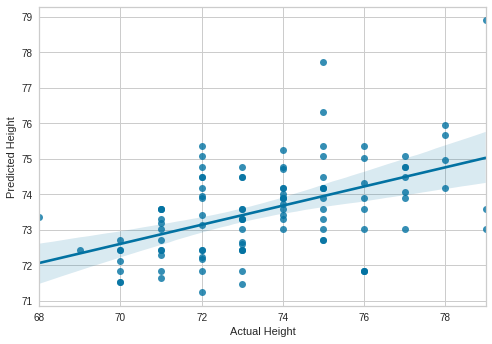

In [250]:
plot = sns.regplot(y_scaler.inverse_transform(y_test), y_scaler.inverse_transform(predictions))
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")

### Print Accuracy of Linear Regression Model

In [ ]:
model.score(X_test, y_test)

0.24428534170324856

### Export Model

In [262]:
import joblib

In [263]:
joblib.dump(model, 'model.joblib')

['model.joblib']

### Verify Model Import Feedbackloop

In [264]:
clf_disk = joblib.load("model.joblib")

### Test Predict From Model Loaded From Disk

View data

In [274]:
df.tail()

,Name,Team,Position,Height,Weight,Age
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01
1033,Josh_Kinney,STL,Relief_Pitcher,73,195.0,27.92


Get one observation and only get the Weight by grabbing Chris_Narveson

In [275]:
pX = df.iloc[[1030]][["Weight"]].values #Feature(s)
pX = pX.reshape(-1,1)
pX

array([[205.]])

Scale Input

In [276]:
target = df["Weight"].values
target = target.reshape(-1, 1)
target

array([[180.],
       [215.],
       [210.],
       ...,
       [205.],
       [190.],
       [195.]])

In [277]:
import numpy as np
input_scaler = StandardScaler().fit(target) #scale relative to the values in the df
scaled_input = input_scaler.transform(pX)
np.array2string(scaled_input, formatter={'float_kind':'{0:.3f}'.format})

'[[0.158]]'

Inverse Transform Predicted Height

In [285]:
result = clf.predict(scaled_input)
print(f"Unscaled prediction {result.tolist()[0]}")
transformed_prediction = y_scaler.inverse_transform(result) #Note the y_scaler is the target scaler
print(f"transformed_prediction {transformed_prediction.tolist()[0]}")

Unscaled prediction [0.08257454232870197]
transformed_prediction [73.88928704227823]
